<a href="https://colab.research.google.com/github/Karan345/DS_ML_Practice/blob/main/Torch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
a=torch.tensor(1.5)
b=torch.tensor(2.5)
c=torch.add(a,b)
print(c)

tensor(4.)


In [2]:
print(torch.__version__)

2.0.1+cu118


### Building MLP

In [3]:
import torch.nn as nn

model=nn.Sequential(
    nn.Linear(8,12),
    nn.ReLU(),
    nn.Linear(12,8),
    nn.ReLU(),
    nn.Linear(8,1),
    nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


# Training a Pytorch Model


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pwd

/content


In [6]:
import numpy as np
import torch.optim as optim

In [7]:
dataset =np.loadtxt('/content/drive/MyDrive/pima-indians-diabetes.csv', delimiter=',')


In [8]:
X = dataset[:,0:8]
y = dataset[:,8]
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

loss_fn = nn.BCELoss() # binary cross-entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 100
batch_size = 10
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.8442347049713135
Finished epoch 1, latest loss 0.6639479398727417
Finished epoch 2, latest loss 0.5904310941696167
Finished epoch 3, latest loss 0.5626702308654785
Finished epoch 4, latest loss 0.5484453439712524
Finished epoch 5, latest loss 0.5379090905189514
Finished epoch 6, latest loss 0.537086009979248
Finished epoch 7, latest loss 0.5352697372436523
Finished epoch 8, latest loss 0.5311218500137329
Finished epoch 9, latest loss 0.5239293575286865
Finished epoch 10, latest loss 0.5189020037651062
Finished epoch 11, latest loss 0.5190120935440063
Finished epoch 12, latest loss 0.5127850770950317
Finished epoch 13, latest loss 0.5104032158851624
Finished epoch 14, latest loss 0.5068543553352356
Finished epoch 15, latest loss 0.5090135931968689
Finished epoch 16, latest loss 0.5013231635093689
Finished epoch 17, latest loss 0.5005406141281128
Finished epoch 18, latest loss 0.501628041267395
Finished epoch 19, latest loss 0.5020172595977783
Finished epo

In [9]:
i = 5
X_sample = X[i:i+1]
y_pred = model(X_sample)
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.2844], grad_fn=<SelectBackward0>)


In [10]:
i = 5
X_sample = X[i:i+1]
model.eval()
with torch.no_grad():
    y_pred = model(X_sample)
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.2844])


In [11]:
model.eval()
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.7799479365348816


#TorchVison

In [14]:
import matplotlib.pyplot as plt
import torchvision

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


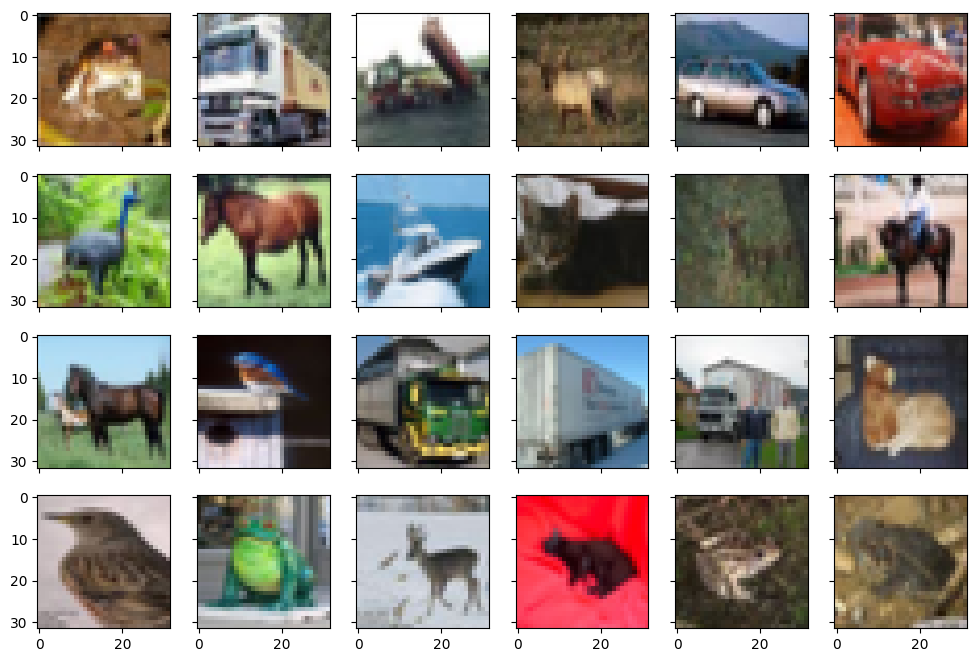

In [13]:
fig,ax = plt.subplots(4,6, sharex=True, sharey=True, figsize=(12,8))
for i in range(0,24):
  row,col = i//6, i%6
  ax[row][col].imshow(trainset.data[i])
plt.show()

# Using Pyorch Dataloader

In [15]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
batch_size=24
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

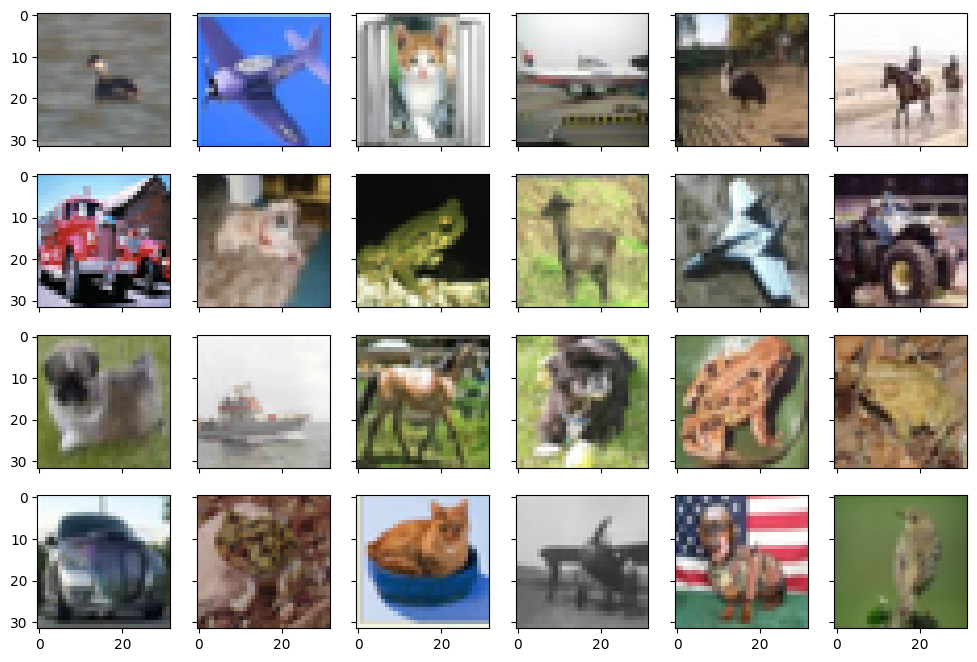

In [24]:
fig,ax = plt.subplots(4,6, sharex=True, sharey=True, figsize=(12,8))
for images,labels in trainloader:
  for i in range(batch_size):
     row,col = i//6, i%6
     ax[row][col].imshow(images[i].numpy().transpose([1,2,0]))
  break
plt.show()

#Convolutional Neural Network